In [74]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file


In [75]:
ski_data = pd.read_csv("../data/ski_data_step3_features.csv")
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276,0.092105,0.004348,0.026316,0.001242
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,0.410091,0.450867,0.280702,0.130435,0.250000,NaN,0.111111,0.006250,0.000000,0.000000
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724,0.230769,0.100000,0.000000,0.000000
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,0.027477,1.754540,0.492708,0.514768,0.666667,NaN,0.145455,0.010296,0.000000,0.000000
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000,0.107692,0.008750,0.015385,0.001250


In [76]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [77]:
big_mountain = ski_data[ski_data.Name.str.contains("Big Mountain")]

In [78]:
big_mountain.T

,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3
quad,2


In [79]:
ski_data.shape

(277, 36)

In [80]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']

In [81]:
ski_data.shape

(276, 36)

In [82]:
X_train,  X_test, y_train, y_test = train_test_split(ski_data.drop(columns='AdultWeekend'),
                                                    ski_data.AdultWeekend, test_size=0.3 ,
                                                    random_state=47)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((193, 35), (83, 35), (193,), (83,))

In [84]:
name_train = X_train[['Name', 'state' ,  'Region']]
name_test =  X_test[['Name', 'state' ,  'Region']]
X_train.drop(columns=['Name', 'state' ,  'Region'],inplace=True)
X_test.drop(columns=['Name', 'state' ,  'Region'], inplace=True)
X_train.shape, X_test.shape

((193, 32), (83, 32))

In [85]:
print(X_train.dtypes)
X_train.select_dtypes('number').shape[1]  ==  X_train.shape[1]

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
resorts_per_state                 

True

In [86]:
train_mean = y_train.mean()
train_mean

63.811088082901556

In [87]:
#Code task 5#
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[63.81108808]])

In [88]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """ 
    return 1 - (((y-ypred)**2).sum()/((y-y.mean())**2).sum())

In [89]:
y_tr_pred_ = np.full(len(y_train), train_mean)
y_tr_pred_[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [90]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [91]:
r_squared(y_train, y_tr_pred)

0.0

In [92]:
r_squared(y_test, np.full(len(y_test), train_mean))

-0.0031235200417913944

In [96]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.0031235200417913944

In [97]:
def mae(y, y_pred):
    """Mean absolute error.
    
    Calcutate the mean absolute error 
    
    """
    abs_error = np.abs(y-y_pred)
    mae = np.mean(abs_error)
    return mae

In [98]:
mae(y_train, y_tr_pred)

17.92346371714677

In [99]:
mae(y_test, y_te_pred)

19.136142081278486

In [100]:
def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

In [101]:
mse(y_train, y_tr_pred)

614.1334096969046

In [102]:
mse(y_test, y_te_pred)

581.4365441953483

In [103]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([24.78171523, 24.11299534])

In [104]:
# sklearn metrics
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0031235200417913944)

In [105]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(17.92346371714677, 19.136142081278486)

In [106]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(614.1334096969046, 581.4365441953483)

In [107]:
X_defaults_median = X_train.median()
X_defaults_median

summit_elev                           2215.000000
vertical_drop                          750.000000
base_elev                             1300.000000
trams                                    0.000000
fastSixes                                0.000000
fastQuads                                0.000000
quad                                     1.000000
triple                                   1.000000
double                                   1.000000
surface                                  2.000000
total_chairs                             7.000000
Runs                                    28.000000
TerrainParks                             2.000000
LongestRun_mi                            1.000000
SkiableTerrain_ac                      170.000000
Snow Making_ac                          96.500000
daysOpenLastYear                       109.000000
yearsOpen                               57.000000
averageSnowfall                        120.000000
projectedDaysOpen                      115.000000


In [108]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)


In [115]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

array([[-0.91993102, -0.90945616, -0.83060204, ...,  0.36484513,
        -0.46094631, -0.38882899],
       [-0.88912245, -0.884982  , -0.80423909, ...,  2.96389608,
        -0.46094631, -0.38882899],
       [ 0.40091624, -0.26089079,  0.54521454, ...,  0.1717268 ,
        -0.46094631, -0.38882899],
       ...,
       [-0.57935632, -0.05286039, -0.66385637, ...,  0.01539291,
         4.51469512,  6.05647867],
       [-0.82274399, -0.95228595, -0.70801431, ...,  0.56869227,
        -0.46094631, -0.38882899],
       [-0.90312634, -0.84827075, -0.83060204, ...,  0.67061583,
        -0.46094631, -0.38882899]])

In [118]:
lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)


LinearRegression()

In [120]:
y_tr_pred= lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [123]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.8177988515690604, 0.7209725843435144)

In [124]:
median_mae = mae(y_train, y_tr_pred), mae(y_test, y_te_pred)
median_mae


(8.547850301825427, 9.407020118581322)

In [125]:
median_mse = mse(y_train, y_tr_pred), mse(y_test, y_te_pred)
median_mse

(111.89581253658478, 161.73156451192273)

In [126]:
# do same with mean()


In [127]:
X_defaults_mean = X_train.mean()
X_defaults_mean

summit_elev                           4074.554404
vertical_drop                         1043.196891
base_elev                             3020.512953
trams                                    0.103627
fastSixes                                0.072539
fastQuads                                0.673575
quad                                     1.010363
triple                                   1.440415
double                                   1.813472
surface                                  2.497409
total_chairs                             7.611399
Runs                                    41.188482
TerrainParks                             2.434783
LongestRun_mi                            1.293122
SkiableTerrain_ac                      448.785340
Snow Making_ac                         129.601190
daysOpenLastYear                       110.100629
yearsOpen                               56.559585
averageSnowfall                        162.310160
projectedDaysOpen                      115.920245


In [128]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)



In [131]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled =scaler.transform(X_te)

In [132]:
lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)


LinearRegression()

In [133]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)


In [134]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8170154093990025, 0.7163814716959963)

In [135]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(112.37695054778276, 164.39269309524346)

In [136]:
#Define a pipeline

In [137]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LinearRegression()
)

type(pipe)

sklearn.pipeline.Pipeline

In [138]:
hasattr(pipe, 'fit')

True

In [140]:
hasattr(pipe, 'predict')

True

In [142]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [145]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [147]:
r2_score(y_train,y_train_pred)

0.8177988515690604

In [148]:
r2_score(y_test,y_test_pred)

0.7209725843435144

In [150]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.536884040670973, 9.41637562578927)

In [151]:
# Pipeline doing as expected 

In [154]:
# Refine the linear model
pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(score_func=f_regression), # default 10
    LinearRegression()
)



In [155]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fe518a94670>)),
                ('linearregression', LinearRegression())])

In [157]:
y_tr_pred = pipe.predict(X_train)

In [158]:
y_te_pred = pipe.predict(X_test)

In [159]:
r2_score(y_train, y_tr_pred)

0.7674914326052744

In [160]:
r2_score(y_test, y_te_pred)

0.6259877354190837

In [161]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=15),
    LinearRegression()
)

In [162]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7fe518a94670>)),
                ('linearregression', LinearRegression())])

In [164]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [165]:
r2_score(y_train, y_tr_pred)

0.7924096060483825

In [166]:
r2_score(y_test, y_te_pred)

0.6376199973170795

In [168]:
# Assessing performance using cross-validation
cv_results = cross_validate(pipe, X_train, y_train, cv =5)

In [170]:
cv_results

{'fit_time': array([0.00586891, 0.00509   , 0.00489998, 0.00525522, 0.00478911]),
 'score_time': array([0.00168896, 0.00177598, 0.00173116, 0.00175476, 0.00165796]),
 'test_score': array([0.63760862, 0.72831381, 0.74443537, 0.5487915 , 0.50441472])}

In [175]:
cv_scores = cv_results['test_score']

In [176]:
np.mean(cv_scores), np.std(cv_scores)

(0.6327128053007864, 0.0950248784987769)

In [177]:
# Hyperparameter search using GridSearchCV

pipe.get_params()

{'memory': None,
 'steps': [('simpleimputer', SimpleImputer(strategy='median')),
  ('standardscaler', StandardScaler()),
  ('selectkbest',
   SelectKBest(k=15, score_func=<function f_regression at 0x7fe518a94670>)),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'simpleimputer': SimpleImputer(strategy='median'),
 'standardscaler': StandardScaler(),
 'selectkbest': SelectKBest(k=15, score_func=<function f_regression at 0x7fe518a94670>),
 'linearregression': LinearRegression(),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__keep_empty_features': False,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'median',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'selectkbest__k': 15,
 'selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True, force_finite=True)>,
 'lin

In [178]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [179]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k':k}


In [180]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [181]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=15,
                                                    score_func=<function f_regression at 0x7fe518a94670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [182]:
score_mean= lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [183]:
lr_grid_cv.best_params_

{'selectkbest__k': 8}

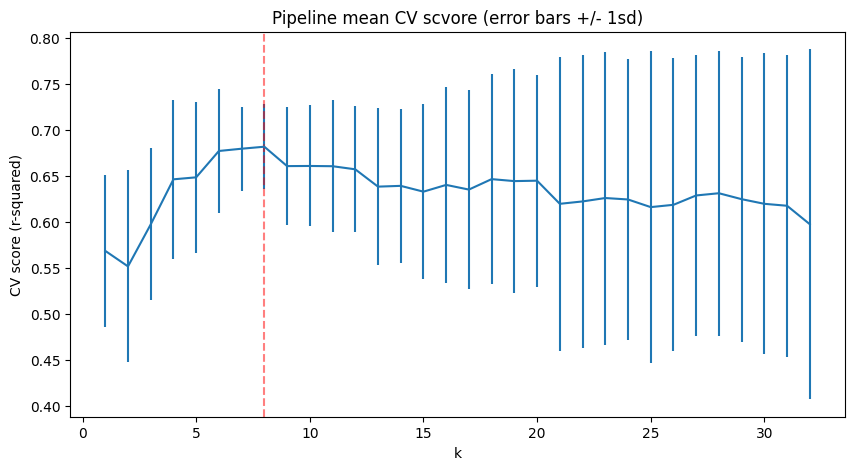

In [184]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title("Pipeline mean CV scvore (error bars +/- 1sd)");